<a href="https://colab.research.google.com/github/JohnDoe-309/FalconX/blob/main/FalconX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install pandas
!pip install gql

In [ ]:
import pandas as pd
import plotly.express as px
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

In [ ]:
#for finding the paid id for UNI/WETH, since UNI/WETH has high transaction count
'''
{
  pairs(first:100 orderBy:txCount orderDirection:desc) {
    id
    token0 {
      name
      symbol
    }
    token1 {
      name
      symbol      
    }
  }
}
'''


In [ ]:
sample_transport = RequestsHTTPTransport(
    url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2",
    verify = True,
    retries = 3,
)

client = Client(
    transport = sample_transport)
#pair id for UNI/WETH is: 0xd3d2e2692501a5c9ca623199d38826e513033a17

query = gql('''
query{
  swaps(orderBy: timestamp, orderDirection: desc, where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}) {
    amount0In
    amount1In
    amount0Out
    amount1Out
    id
    amountUSD
    pair {
      token0 {
        id
        symbol
      }
      token1 {
        id
        symbol
      }
    }
  }
}
''')

response = client.execute(query)


In [ ]:
swaps = []
for i in response['swaps']:
  swaps.append([     
                
                
                i['id'],                
                i['pair']['token0']['id'],
                i['pair']['token0']['symbol'],
                i['amount0In'],i['amount0Out'],
                i['pair']['token1']['id'],
                i['pair']['token1']['symbol'],
                i['amount1In'],i['amount1Out'], 
                i['amountUSD']              

  ])

df = pd.DataFrame(swaps)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0xce5b9035c10e17695e9f5f93bd615fd246d83e1d536e...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,65.492630527564215151,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,0.553656907833135407,1038.391318909376490834400939248353
1,0x11dc9990ce1014e433d0bb9a7c6d2de7155c0f09f59e...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,150,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,1.268175411419874485,2369.368897317798953341098735652424
2,0x21d8e5447ef80e0c43087ffb629cdcbd424d4d84e028...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,1541.102197718176057238,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,13.1,0,24476.16711322774735619167693493299
3,0x82a461ce0749ad1f72e95bc5fd8cab014d0d09545500...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,3176.212297639209785199,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,26.944914994473615649,0,49384.48199010947845104759764618398
4,0xf9ef2a354376637524cfd2c4508ca4a49062c9b10752...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,4404.858470083711794143,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,37.196786566433646054,0,68084.05096290438498933264371782091


In [ ]:
df.columns = ['Transaction ID', 'Token1 Ethereum ID(UNI)', 'Token1', 'Quantity of token1 bought','Quantity of token1 sold','Token2 Ethereum ID(WETH)', 'Token2', 'Quantity of token2 bought','Quantity of token2 sold','Value of trade in USD']
df

,Transaction ID,Token1 Ethereum ID(UNI),Token1,Quantity of token1 bought,Quantity of token1 sold,Token2 Ethereum ID(WETH),Token2,Quantity of token2 bought,Quantity of token2 sold,Value of trade in USD
0,0xce5b9035c10e17695e9f5f93bd615fd246d83e1d536e...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,65.492630527564215151,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,0.553656907833135407,1038.391318909376490834400939248353
1,0x11dc9990ce1014e433d0bb9a7c6d2de7155c0f09f59e...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,150,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,1.268175411419874485,2369.368897317798953341098735652424
2,0x21d8e5447ef80e0c43087ffb629cdcbd424d4d84e028...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,1541.102197718176057238,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,13.1,0,24476.16711322774735619167693493299
3,0x82a461ce0749ad1f72e95bc5fd8cab014d0d09545500...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,3176.212297639209785199,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,26.944914994473615649,0,49384.48199010947845104759764618398
4,0xf9ef2a354376637524cfd2c4508ca4a49062c9b10752...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,4404.858470083711794143,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,37.196786566433646054,0,68084.05096290438498933264371782091
...,...,...,...,...,...,...,...,...,...,...
95,0xba23317d9c01bbcce7ebe4ea93fc88213eb883ce4553...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,794.654083219807078638,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,6.312643252622296691,0,11579.93019138164074025432785902321
96,0xdc9cc901a4723e9a479ed7816e9a15738c49683f6e54...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,0,2919.395767120222920514,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,23.15625,0,42241.68994489148581702393521591685
97,0xba7e1f46c0ef25a0722007dad390e91235ebc2c56d6b...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,11382.412796328586535819,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,90.053098000238099491,164501.7804117064140326478228525828
98,0x4c976ef09375589858dcd67d3d811beeafee01a794e3...,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,1367.38897885956556098,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0,10.87445699914108238,19864.9484677130772107444935417977


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.dtypes

Transaction ID               object
Token1 Ethereum ID(UNI)      object
Token1                       object
Quantity of token1 bought    object
Quantity of token1 sold      object
Token2 Ethereum ID(WETH)     object
Token2                       object
Quantity of token2 bought    object
Quantity of token2 sold      object
Value of trade in USD        object
dtype: object

In [ ]:
df['Quantity of token1 bought'] = df['Quantity of token1 sold'].astype(float)
df['Quantity of token2 bought'] = df['Quantity of token2 sold'].astype(float)
df['Quantity of token1 sold'] = df['Quantity of token1 bought'].astype(float)
df['Quantity of token2 sold'] = df['Quantity of token2 bought'].astype(float)

In [68]:
for i in range(100):
  if df[3][i] > 0:
    print(df[8][i]+" "+df[3][i])
    #x2[i] = df['Quantity of token2 sold'][i]/df['Quantity of token1 bought'][i]
    #x1[i] = 0
  elif df['Quantity of token2 bought'][i] > 0:
    print(df[4][i] + " " + df[7][i])
    #x1[i] = df['Quantity of token2 bought'][i]/df['Quantity of token1 sold'][i]
    #x2[i] = 0
  y = i+1

KeyError: ignored

ValueError: ignored

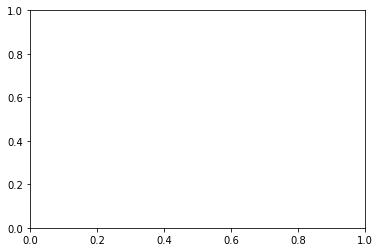

In [ ]:
plt.plot(x1, y, label = "UNI is bought")
plt.plot(x2, y, label = "UNI is sold")
# naming the x axis
plt.xlabel('WETH-UNI Exchange Rate')
# naming the y axis
plt.ylabel('Trade Number')
# title of the graph
plt.title('Value of UNI in WETH')
plt.show()